In [ ]:
# Passo 1: Instalação de dependências
!pip install tensorflow opencv-python matplotlib

import os
import zipfile
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt



In [ ]:
# Passo 2: Extração do dataset
from google.colab import files

# Faça o upload do arquivo "dataset.zip"
uploaded = files.upload()

# Extraia o arquivo ZIP
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Diretórios do dataset
data_dir = "dataset"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")

Saving dataset.zip to dataset.zip


In [ ]:
# Passo 3: Preprocessamento de dados e geração de imagens
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 45 images belonging to 4 classes.
Found 21 images belonging to 4 classes.


In [ ]:
# Passo 4: Construção do modelo de classificação
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Passo 5: Treinamento do modelo
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3060 - loss: 1.6002 - val_accuracy: 0.2381 - val_loss: 1.4228
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 861ms/step - accuracy: 0.3012 - loss: 1.3675 - val_accuracy: 0.2381 - val_loss: 1.3834
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 3s/step - accuracy: 0.4986 - loss: 1.3049 - val_accuracy: 0.4286 - val_loss: 1.4012
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 838ms/step - accuracy: 0.7181 - loss: 1.2100 - val_accuracy: 0.3333 - val_loss: 1.4011
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 865ms/step - accuracy: 0.9199 - loss: 1.0234 - val_accuracy: 0.3810 - val_loss: 1.4210
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 855ms/step - accuracy: 0.8903 - loss: 0.7959 - val_accuracy: 0.3810 - val_loss: 1.4995
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8114 - loss: 0.5605 - val_accuracy: 0.3810 - val_loss: 1.6186
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9151 - loss: 0.3075 - val_accuracy: 0.4762 - val_loss: 1.7475
Epoc

In [ ]:
# Passo 6: Salvando o modelo
model.save("face_recognition_model.h5")

In [ ]:
# Passo 7: Função para detecção e reconhecimento facial
def detect_and_recognize(image_path, model, class_indices):
    # Carregar a imagem
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        face = img[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (150, 150)) / 255.0
        face_array = np.expand_dims(face_resized, axis=0)

        prediction = model.predict(face_array)
        label = list(class_indices.keys())[np.argmax(prediction)]
        confidence = np.max(prediction)

        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, f"{label} ({confidence:.2f})", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


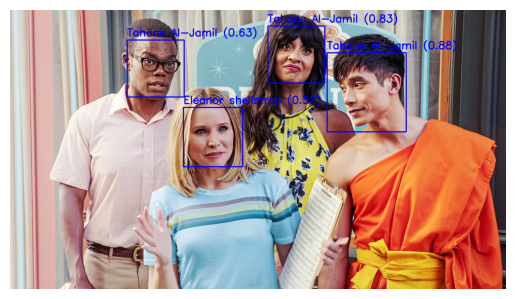

In [ ]:
# Passo 8: Testando o modelo
class_indices = train_generator.class_indices
image_path = "all.jpg"
detect_and_recognize(image_path, model, class_indices)

In [ ]:
# OBS: os erros de identificação presentes na imagem de teste final demonstram a falta de uma maior quantidade de imagens dos personagens no dataset para melhor identificá-los